## Import Libraries

In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LSTM, TimeDistributed, Flatten, Dense, MaxPooling2D
from pyts.image import GramianAngularField
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from skimage.transform import resize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# model

In [ ]:
# CSV 파일에서 데이터 로드
df = pd.read_excel("/content/drive/MyDrive/min-max_scaled.xlsx", parse_dates=True, index_col='Year')

# GAF transformer
gaf = GramianAngularField(image_size=11, method='summation')  # image_size를 11로 설정

# GAF 이미지를 저장할 빈 배열 생성
gaf_images = np.empty((len(df.columns) - 2, len(df.index.year.unique()), 11, 11, 3))

# 모든 카운티에 대해 연도별로 GAF 이미지 생성
for i, county in enumerate(df.columns[2:]):  # 카운티들을 나열합니다.
    # 연도별로 데이터를 분리
    for j, year in enumerate(df.index.year.unique()):
        for k, index in enumerate(['NINO12', 'ONI', county]):
            data = df.loc[df.index.year == year, index].values.reshape(1, -1)
            gaf_image = gaf.fit_transform(data)
            # 생성된 GAF 이미지를 배열에 추가
            gaf_images[i, j, :, :, k] = gaf_image[0]

# numpy 배열 저장
np.save('Gaf image final.npy', gaf_images)

In [ ]:
# 이미지 데이터 로드
gaf_images = np.load('Gaf image final.npy')

# 이미지 데이터의 개수 확인
num_images = gaf_images.shape[0]* gaf_images.shape[1]

# County 순서 확인
counties = df.columns[3:]  # 이미지 데이터의 County 순서

# 이미지 데이터의 개수와 순서 출력
print("이미지 데이터 개수:", num_images)
print("County 순서:")
for i, county in enumerate(counties):
    print(f"{i+1}. {county}")

이미지 데이터 개수: 23391
County 순서:
1. 17-101
2. 17-103
3. 17-105
4. 17-107
5. 17-109
6. 17-11
7. 17-111
8. 17-113
9. 17-115
10. 17-117
11. 17-119
12. 17-121
13. 17-123
14. 17-125
15. 17-127
16. 17-129
17. 17-13
18. 17-131
19. 17-133
20. 17-135
21. 17-137
22. 17-139
23. 17-141
24. 17-143
25. 17-145
26. 17-147
27. 17-149
28. 17-15
29. 17-151
30. 17-153
31. 17-155
32. 17-157
33. 17-159
34. 17-161
35. 17-163
36. 17-165
37. 17-167
38. 17-169
39. 17-17
40. 17-171
41. 17-173
42. 17-175
43. 17-177
44. 17-179
45. 17-181
46. 17-183
47. 17-185
48. 17-187
49. 17-189
50. 17-19
51. 17-191
52. 17-193
53. 17-195
54. 17-197
55. 17-199
56. 17-201
57. 17-203
58. 17-21
59. 17-23
60. 17-25
61. 17-27
62. 17-29
63. 17-3
64. 17-31
65. 17-33
66. 17-35
67. 17-37
68. 17-39
69. 17-41
70. 17-43
71. 17-45
72. 17-47
73. 17-49
74. 17-5
75. 17-51
76. 17-53
77. 17-55
78. 17-57
79. 17-59
80. 17-61
81. 17-63
82. 17-65
83. 17-67
84. 17-69
85. 17-7
86. 17-71
87. 17-73
88. 17-75
89. 17-77
90. 17-79
91. 17-81
92. 17-83
93. 17-85
9

In [ ]:
print(gaf_images.shape)

(1017, 23, 11, 11, 3)


In [ ]:
gaf_images = np.load('Gaf image final.npy')
df = pd.read_excel('/content/drive/MyDrive/min-max_scaled.xlsx')

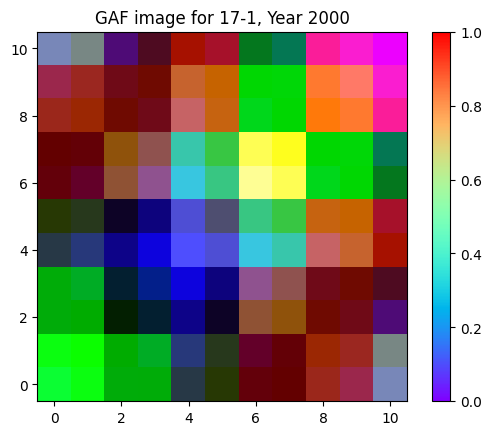

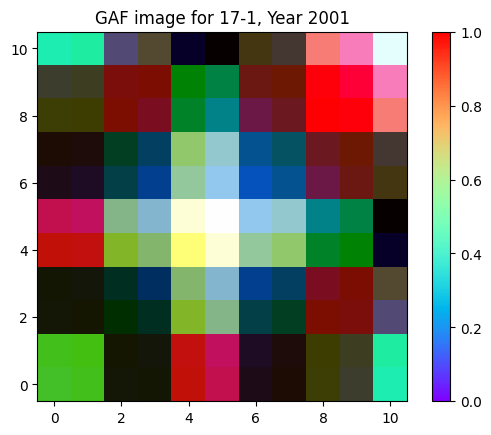

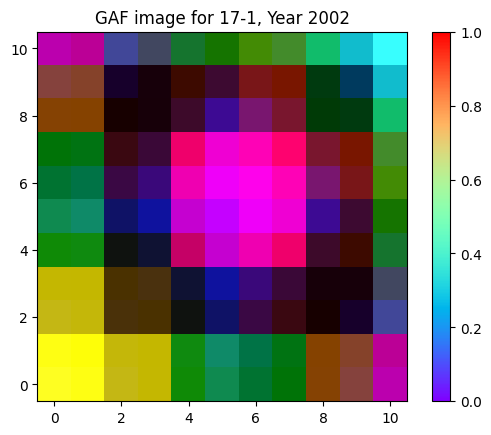

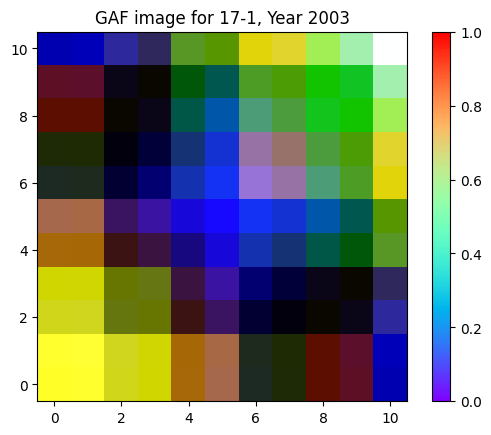

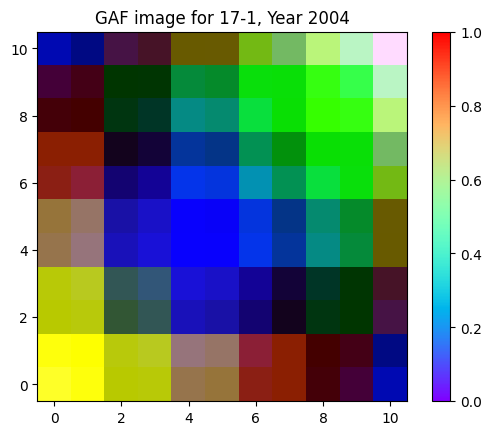

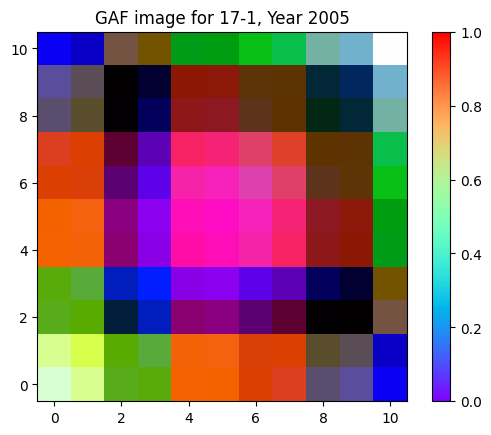

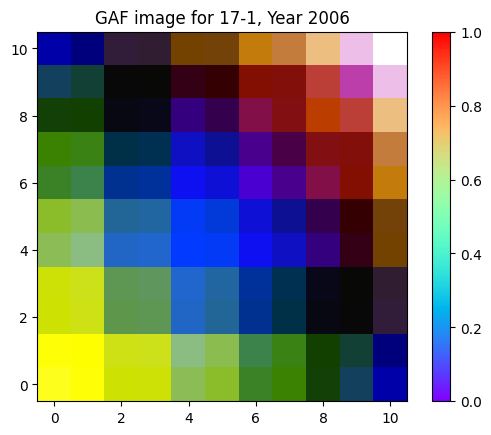

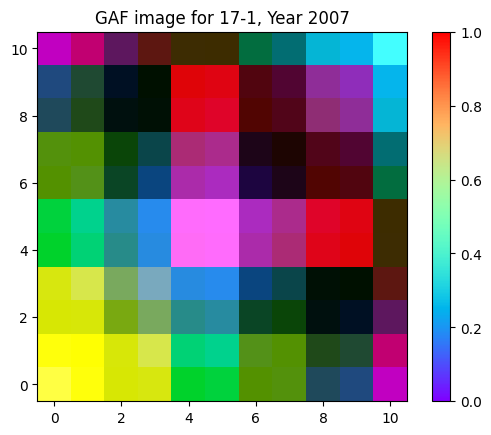

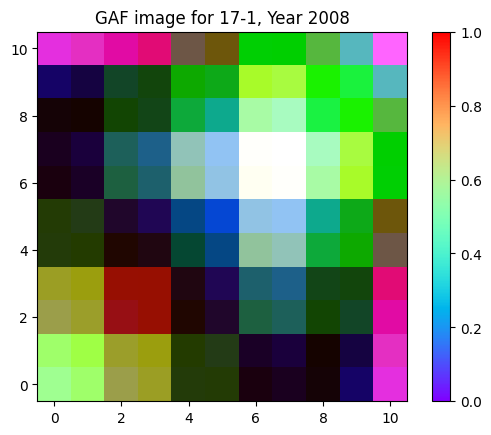

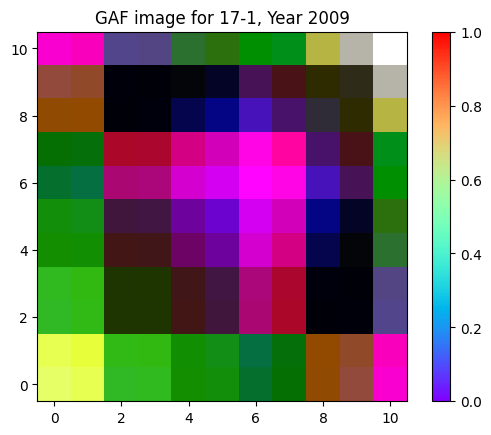

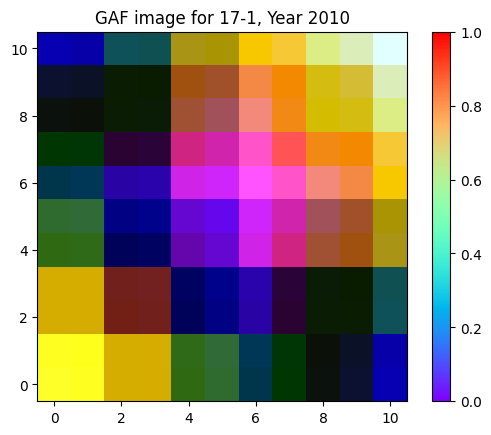

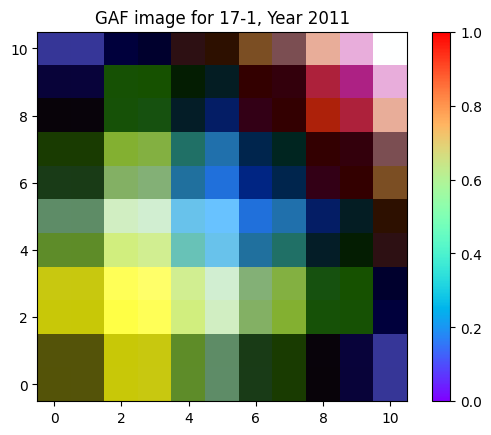

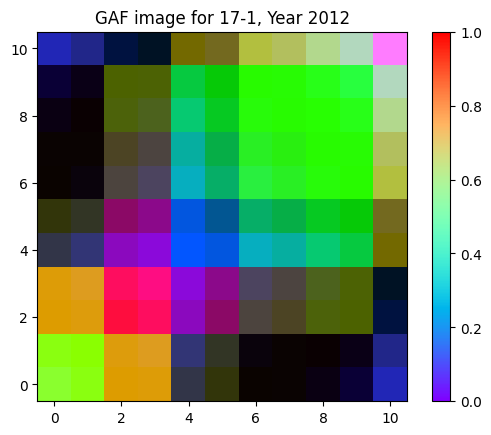

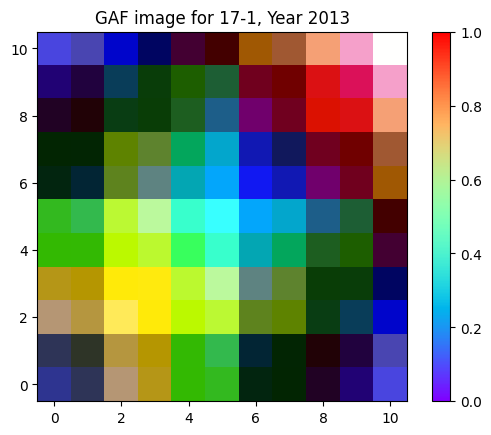

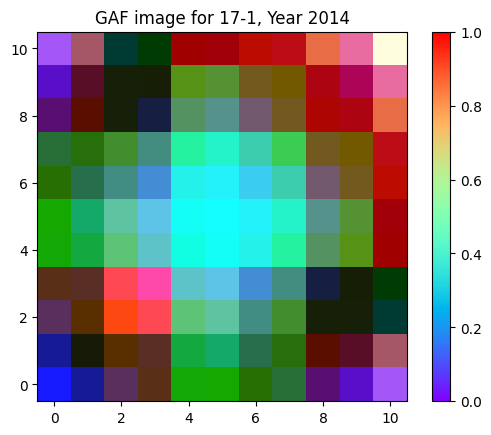

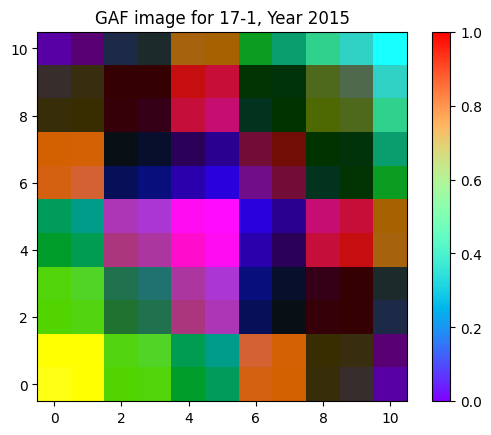

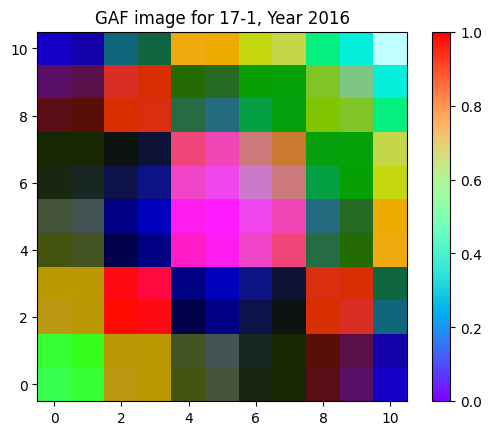

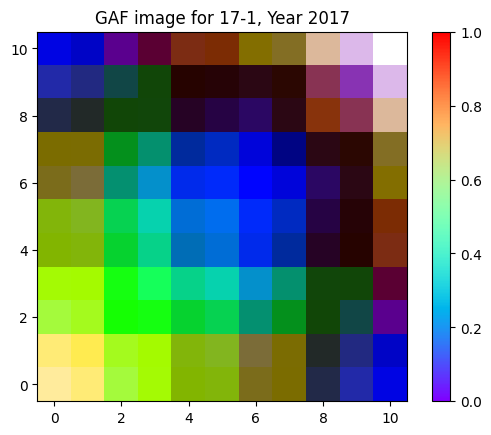

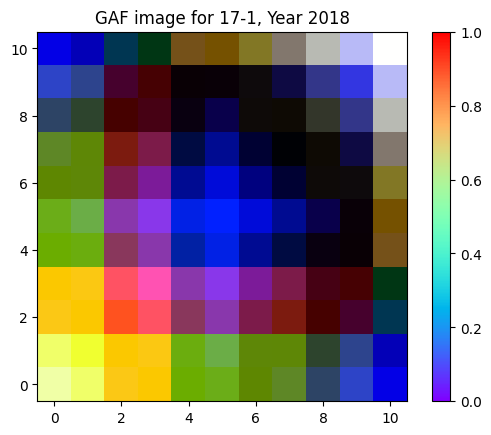

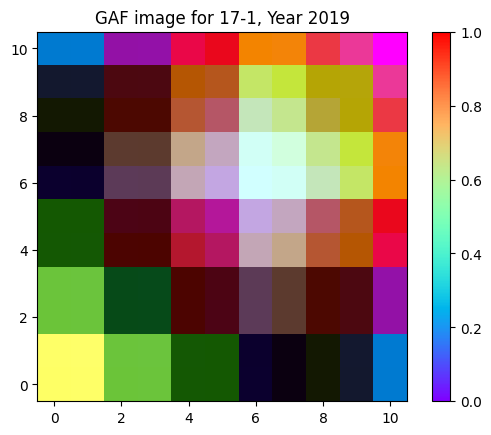

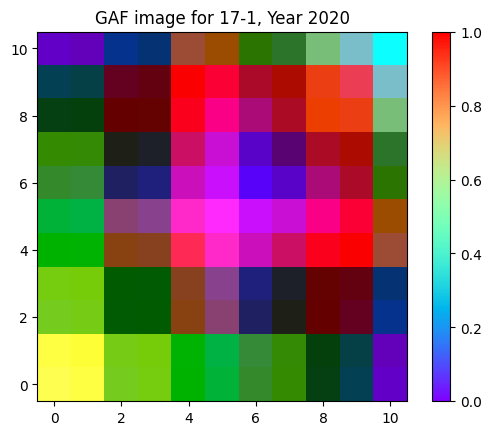

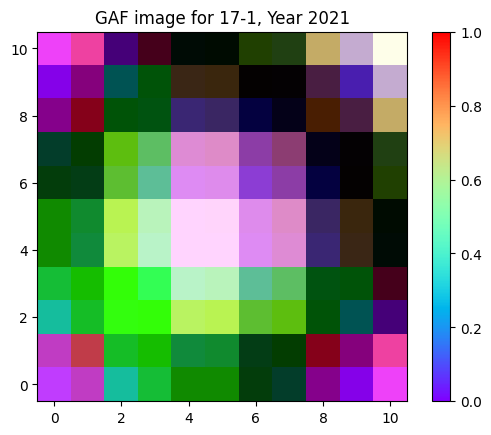

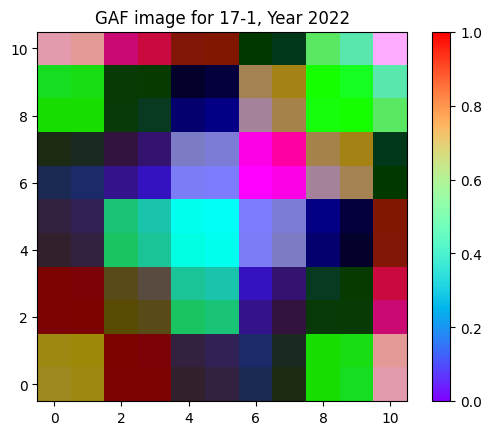

In [ ]:
county_list = df.columns[3:]
# 첫 번째 카운티의 GAF 이미지 선택


county_images = gaf_images[0]

# 이미지 출력
for i in range(len(county_images)):
    # 이미지 정규화하여 값의 범위를 [0, 1]로 조정
    normalized_image = (county_images[i] - np.min(county_images[i])) / (np.max(county_images[i]) - np.min(county_images[i]))
    plt.imshow(normalized_image, cmap='rainbow', origin='lower')
    plt.title(f'GAF image for {county_list[0]}, Year {i+2000}')
    plt.colorbar()
    plt.show()

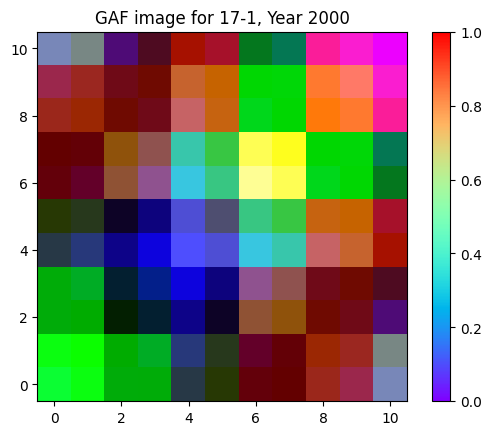

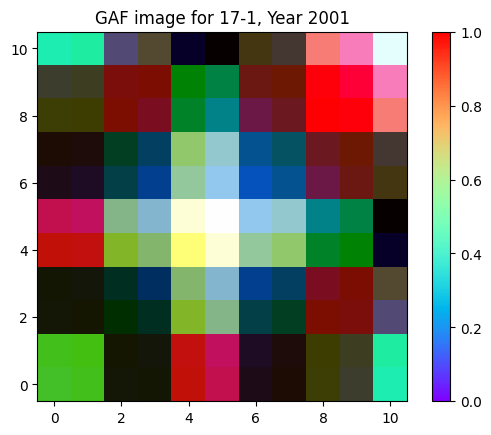

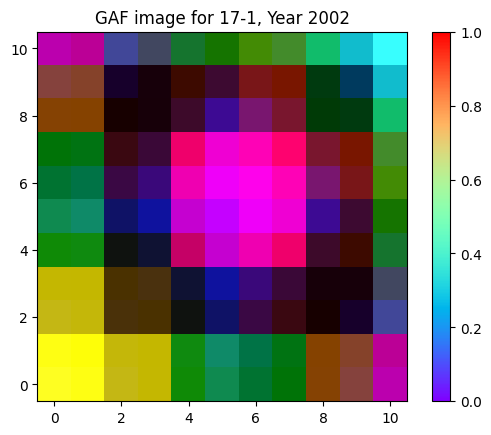

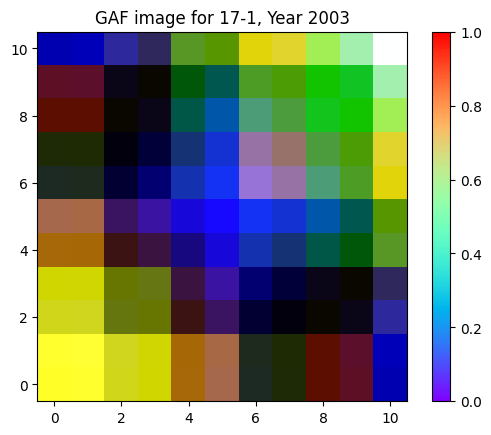

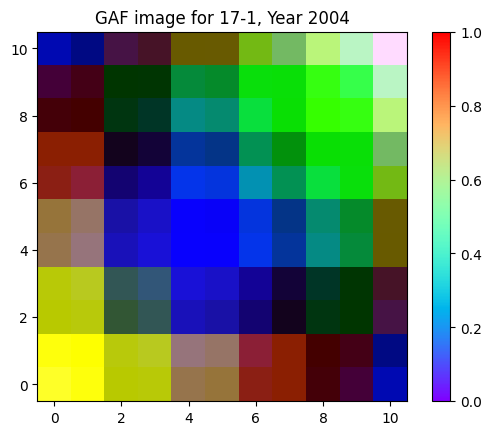

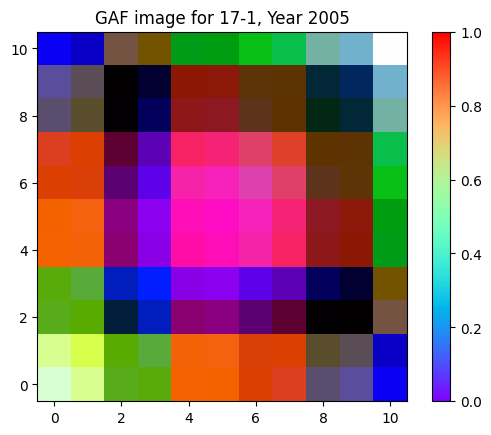

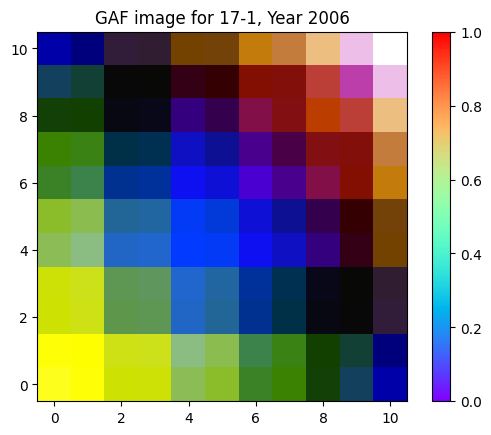

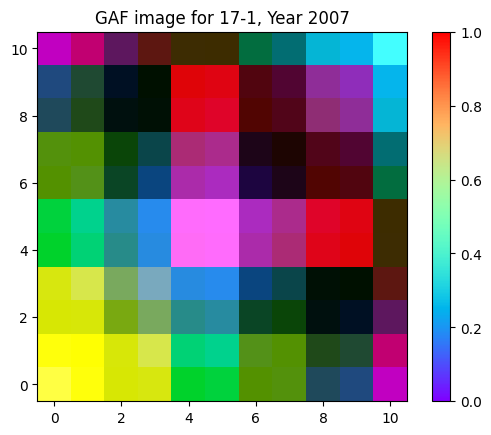

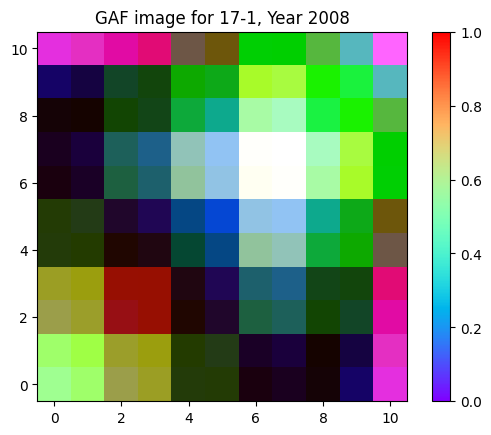

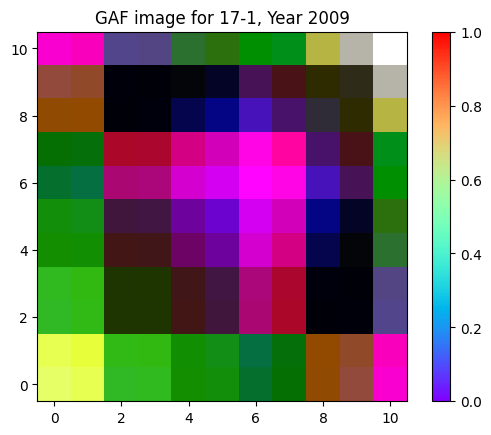

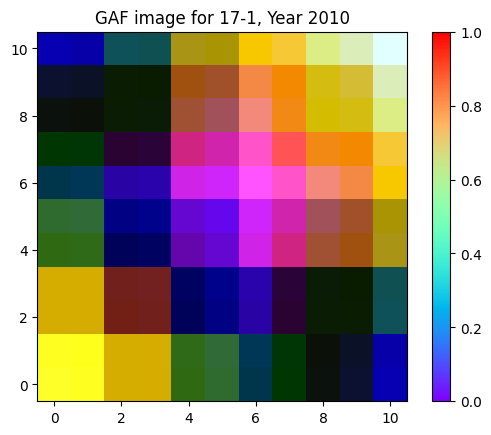

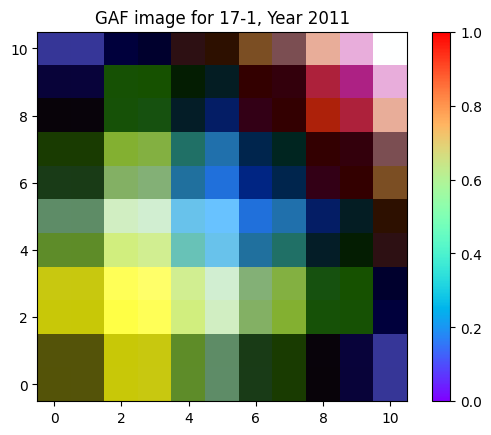

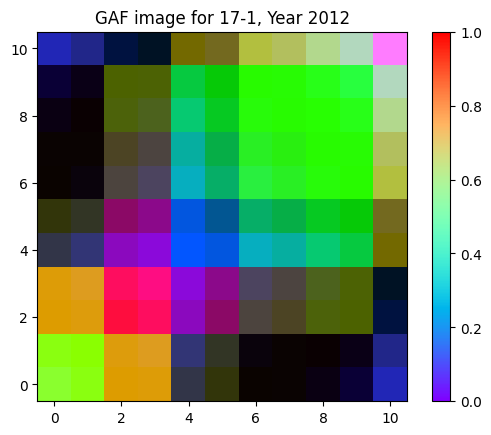

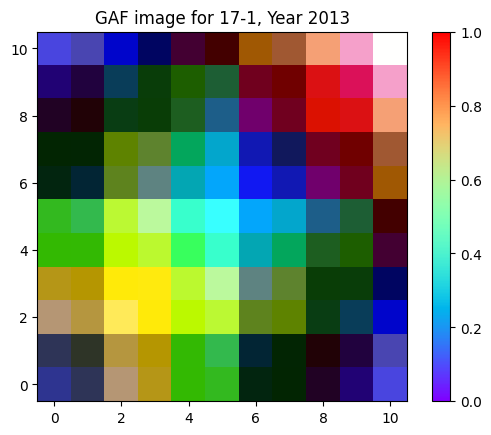

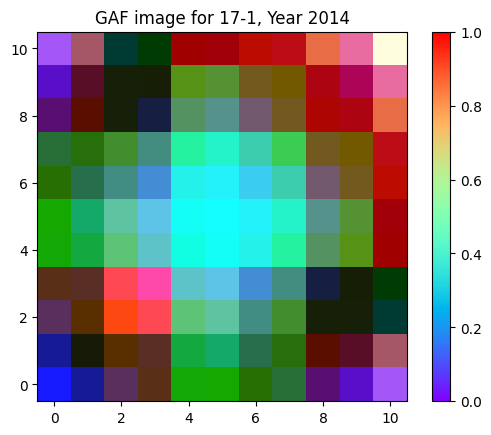

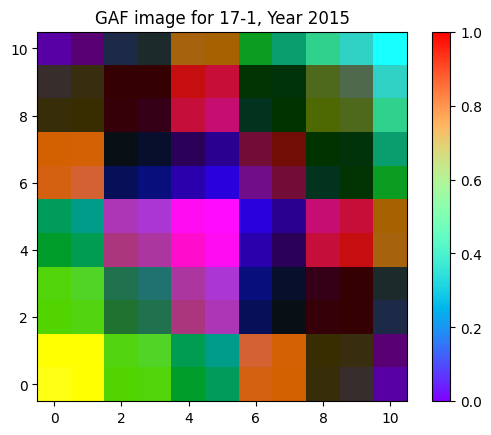

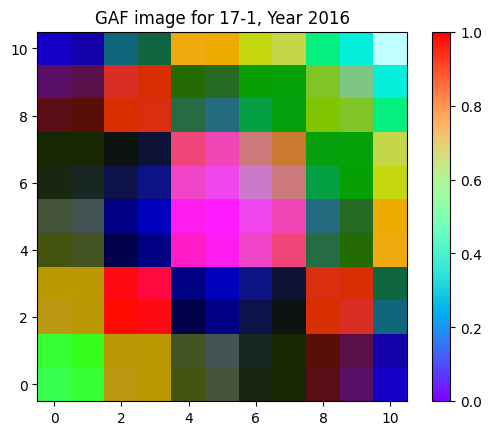

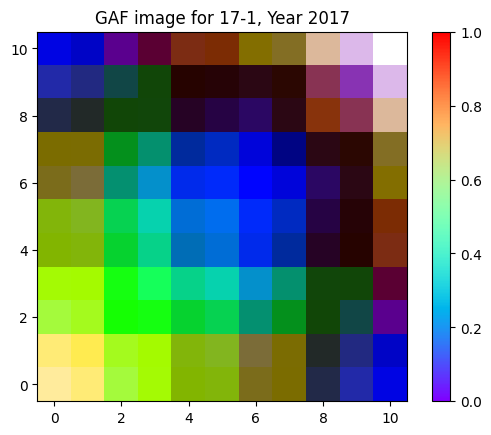

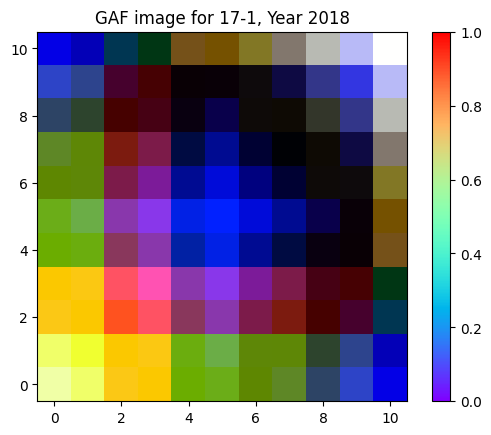

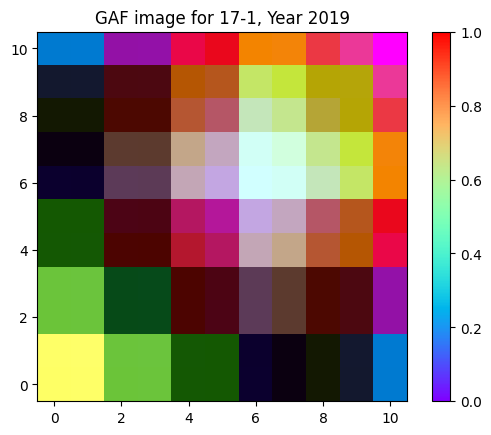

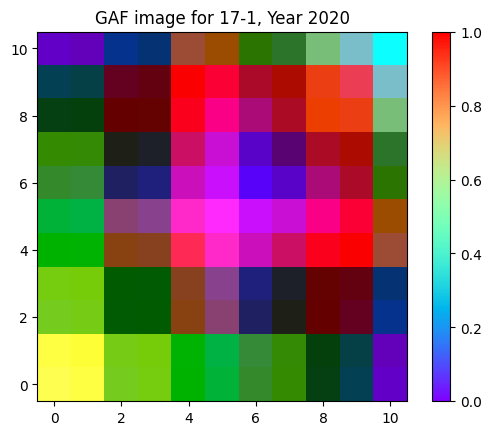

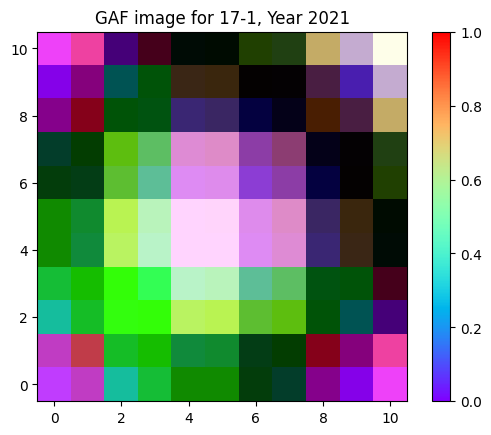

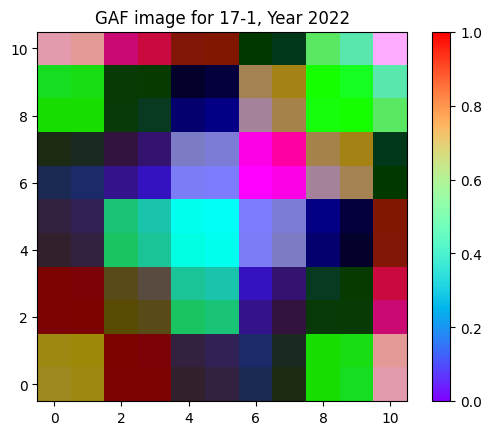

In [ ]:

county_list = df.columns[3:]
# 첫 번째 카운티의 GAF 이미지 선택


county_images = gaf_images[0]

# 이미지 출력
for i in range(len(county_images)):
    # 이미지 정규화하여 값의 범위를 [0, 1]로 조정
    normalized_image = (county_images[i] - np.min(county_images[i])) / (np.max(county_images[i]) - np.min(county_images[i]))
    plt.imshow(normalized_image, cmap='rainbow', origin='lower')
    plt.title(f'GAF image for {county_list[0]}, Year {i+2000}')
    plt.colorbar()
    plt.show()

In [ ]:
images = gaf_images.reshape((gaf_images.shape[1], gaf_images.shape[0], gaf_images.shape[2], gaf_images.shape[3], gaf_images.shape[4]))
images = images[1:]
images.shape

(22, 1017, 11, 11, 3)

In [ ]:
usy = pd.read_excel("/content/drive/MyDrive/Feed_Grains_Excel.xlsx")
usy.columns=usy.iloc[0]
usy=usy.iloc[-24:-1,[0, -1]]
usy=usy.set_index('Year')
usy=usy.astype(float)
usy_ld = np.log(usy).diff().dropna()
usy_ld.T

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,,,,,,,,,,,,,,,,,,,,,
Amount,0.009451,-0.066567,0.095099,0.119813,-0.080511,0.008081,0.010674,0.017106,0.069906,-0.074482,...,0.250231,0.078436,-0.015321,0.036156,0.01139,-0.001133,-0.051771,0.023017,0.030453,-0.0192


In [ ]:
usy = pd.read_excel("/content/drive/MyDrive/yd.xlsx")
#usy = usy[1:]
usy=usy.set_index('Year')
usy=usy.astype(float)
usy = usy[1:]
usy

,17-1,17-101,17-103,17-105,17-107,17-109,17-11,17-111,17-113,17-115,...,55-81,55-83,55-87,55-89,55-9,55-91,55-93,55-95,55-97,55-99
Year,,,,,,,,,,,,,,,,,,,,,
2001,152.000000,145.000,160.0,145.0,151.0,169.000000,169.0,135.00,158.0,169.0,...,109.0,110.0,105.0,111.000000,114.000,123.0,128.0,123.0,123.0,112.00000
2002,146.000000,97.000,165.0,137.0,153.0,165.000000,163.0,102.00,144.0,133.0,...,154.0,112.0,143.0,120.000000,136.000,146.0,160.0,145.0,132.0,122.00000
2003,171.000000,121.000,152.0,168.0,189.0,179.000000,175.0,145.00,182.0,188.0,...,116.0,135.0,153.0,130.000000,156.000,130.0,124.0,117.0,124.0,113.00000
2004,195.000000,172.000,185.0,181.0,188.0,198.000000,186.0,157.00,185.0,191.0,...,124.0,105.0,105.0,77.000000,113.000,140.0,139.0,117.0,136.0,101.00000
2005,129.000000,135.000,142.0,145.0,144.0,160.000000,136.0,117.00,161.0,175.0,...,143.0,119.0,159.0,153.000000,141.000,153.0,166.0,140.0,134.0,94.00000
2006,129.000000,142.000,188.0,176.0,171.0,174.000000,178.0,170.00,182.0,179.0,...,137.0,143.0,137.0,146.000000,124.000,132.0,142.0,84.0,139.0,103.00000
2007,162.000000,133.000,182.0,189.0,197.0,193.000000,195.0,177.00,196.0,191.0,...,122.0,97.0,136.0,152.000000,116.000,135.0,130.0,90.0,141.0,92.00000
2008,171.000000,148.000,182.0,187.0,188.0,206.000000,199.0,158.00,190.0,188.0,...,135.0,118.0,142.0,143.464706,114.000,146.0,162.0,109.0,124.0,86.00000
2009,172.000000,146.000,168.0,184.0,188.0,188.000000,176.0,143.00,186.0,192.0,...,148.0,126.0,150.0,139.000000,133.000,159.0,176.0,133.0,152.0,118.00000


In [ ]:
len(county_images)

23

In [ ]:
X = np.array(images)
#y = usy_ld.values
y = usy.values
X.shape

(22, 1017, 11, 11, 3)

In [ ]:
X = X.reshape((X.shape[0], X.shape[2], X.shape[1], X.shape[3], X.shape[4]))
train_X, valid_X = X[:18], X[18:]
train_y, valid_y = y[:18], y[18:]

In [ ]:
#model = Sequential()
#model.add(TimeDistributed(Conv2D(64, (3,3), activation='relu'), input_shape=(None, X.shape[2], X.shape[3], 3)))
#model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
#model.add(TimeDistributed(Flatten()))
#model.add(LSTM(50, activation='relu'))
#model.add(Dense(1))

In [ ]:
# RGB
model = Sequential()

model.add(TimeDistributed(Conv2D(64, (1,3), padding='same', activation='relu'),
                           input_shape=(None, X.shape[2], X.shape[3], 3)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(50, activation='relu'))

model.add(Dense(1017))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(train_X, train_y,
                    validation_data=(valid_X, valid_y),
                    epochs=100, batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 1s 901ms/step - loss: 439.5798 - val_loss: 951.0765
Epoch 2/100
1/1 [==============================] - 1s 820ms/step - loss: 436.2158 - val_loss: 947.2693
Epoch 3/100
1/1 [==============================] - 1s 801ms/step - loss: 433.4921 - val_loss: 947.3386
Epoch 4/100
1/1 [==============================] - 1s 828ms/step - loss: 431.1172 - val_loss: 952.5873
Epoch 5/100
1/1 [==============================] - 1s 837ms/step - loss: 429.0310 - val_loss: 961.4976
Epoch 6/100
1/1 [==============================] - 1s 840ms/step - loss: 427.1298 - val_loss: 972.7529
Epoch 7/100
1/1 [==============================] - 1s 826ms/step - loss: 425.1740 - val_loss: 980.9577
Epoch 8/100
1/1 [==============================] - 1s 831ms/step - loss: 422.9467 - val_loss: 981.1989
Epoch 9/100
1/1 [==============================] - 1s 804ms/step - loss: 420.1085 - val_loss: 972.2606
Epoch 10/100
1/1 [==============================] - 1s 824ms/step - loss:

In [ ]:
predictions = model.predict(valid_X)

1/1 [==============================] - 0s 69ms/step


In [ ]:
#추정치(2019~2022)
pred = pd.DataFrame(predictions)
pred['Year'] = [i for i in range(2019, 2023)]
pred

,0,1,2,3,4,5,6,7,8,9,...,1008,1009,1010,1011,1012,1013,1014,1015,1016,Year
0,157.279251,140.854111,168.345566,164.776718,179.024460,180.117950,178.378265,156.023880,181.946533,176.037460,...,129.597412,143.746674,132.592056,128.195847,143.130417,148.983383,132.990082,133.562622,101.145035,2019
1,161.047958,143.209793,173.602371,164.197647,177.331787,179.011047,180.476349,155.930389,181.629807,179.282318,...,128.470169,145.742493,134.043945,132.911453,141.464325,151.851883,133.516739,135.068710,101.373535,2020
2,155.346405,135.862259,166.655014,162.718048,175.848022,178.299652,177.565475,154.686020,181.484634,169.680984,...,131.362930,140.875351,129.737854,124.673058,141.157242,144.881058,132.692352,130.302490,97.674042,2021
3,157.317383,137.788269,166.791885,162.819962,178.617966,178.714844,180.580780,156.272995,179.463608,173.711044,...,132.366638,142.027679,129.953156,128.306442,142.244064,147.355286,133.703339,131.201431,101.124062,2022


In [ ]:
pred.to_excel('prediction.xlsx')

# model 2

In [ ]:
# 이미지 데이터 로드
gaf_images2 = np.load('Gaf image final_ONI.npy')

# 이미지 데이터의 개수 확인
num_images = gaf_images2.shape[0]* gaf_images2.shape[1]

# County 순서 확인
counties = df.columns[3:]  # 이미지 데이터의 County 순서

# 이미지 데이터의 개수와 순서 출력
print("이미지 데이터 개수:", num_images)
print("County 순서:")
for i, county in enumerate(counties):
    print(f"{i+1}. {county}")

이미지 데이터 개수: 23391
County 순서:
1. 17-1
2. 17-101
3. 17-103
4. 17-105
5. 17-107
6. 17-109
7. 17-11
8. 17-111
9. 17-113
10. 17-115
11. 17-117
12. 17-119
13. 17-121
14. 17-123
15. 17-125
16. 17-127
17. 17-129
18. 17-13
19. 17-131
20. 17-133
21. 17-135
22. 17-137
23. 17-139
24. 17-141
25. 17-143
26. 17-145
27. 17-147
28. 17-149
29. 17-15
30. 17-151
31. 17-153
32. 17-155
33. 17-157
34. 17-159
35. 17-161
36. 17-163
37. 17-165
38. 17-167
39. 17-169
40. 17-17
41. 17-171
42. 17-173
43. 17-175
44. 17-177
45. 17-179
46. 17-181
47. 17-183
48. 17-185
49. 17-187
50. 17-189
51. 17-19
52. 17-191
53. 17-193
54. 17-195
55. 17-197
56. 17-199
57. 17-201
58. 17-203
59. 17-21
60. 17-23
61. 17-25
62. 17-27
63. 17-29
64. 17-3
65. 17-31
66. 17-33
67. 17-35
68. 17-37
69. 17-39
70. 17-41
71. 17-43
72. 17-45
73. 17-47
74. 17-49
75. 17-5
76. 17-51
77. 17-53
78. 17-55
79. 17-57
80. 17-59
81. 17-61
82. 17-63
83. 17-65
84. 17-67
85. 17-69
86. 17-7
87. 17-71
88. 17-73
89. 17-75
90. 17-77
91. 17-79
92. 17-81
93. 17-83
94

In [ ]:
print(gaf_images2.shape)

(1017, 23, 11, 11, 2)


In [ ]:
images2 = gaf_images2.reshape((gaf_images2.shape[1], gaf_images2.shape[0], gaf_images2.shape[2], gaf_images2.shape[3], gaf_images2.shape[4]))
images2 = images2[1:]
images2.shape

(22, 1017, 11, 11, 2)

In [ ]:
X = np.array(images2)
y = usy.values
X.shape

(22, 1017, 11, 11, 2)

In [ ]:
X = X.reshape((X.shape[0], X.shape[2], X.shape[1], X.shape[3], X.shape[4]))
train_X, valid_X = X[:18], X[18:]
train_y, valid_y = y[:18], y[18:]

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv2D(64, (3,3), activation='relu'), input_shape=(None, X.shape[2], X.shape[3], 2)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1017))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(train_X, train_y,
                    validation_data=(valid_X, valid_y),
                    epochs=100, batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 20719.1680 - val_loss: 25827.8555
Epoch 2/100
1/1 [==============================] - 1s 547ms/step - loss: 20506.4609 - val_loss: 25662.8398
Epoch 3/100
1/1 [==============================] - 1s 569ms/step - loss: 20312.8281 - val_loss: 25993.3359
Epoch 4/100
1/1 [==============================] - 1s 541ms/step - loss: 21344.4414 - val_loss: 25176.3965
Epoch 5/100
1/1 [==============================] - 1s 556ms/step - loss: 19952.4531 - val_loss: 24187.1211
Epoch 6/100
1/1 [==============================] - 1s 569ms/step - loss: 19123.7090 - val_loss: 23486.1133
Epoch 7/100
1/1 [==============================] - 1s 558ms/step - loss: 18613.2422 - val_loss: 23083.5000
Epoch 8/100
1/1 [==============================] - 1s 545ms/step - loss: 18334.6719 - val_loss: 22530.3145
Epoch 9/100
1/1 [==============================] - 1s 553ms/step - loss: 17832.4219 - val_loss: 22439.5508
Epoch 10/100
1/1 [======================

In [ ]:
predictions = model.predict(valid_X)

1/1 [==============================] - 0s 201ms/step


In [ ]:
#추정치(2019~2022)
pred = pd.DataFrame(predictions)
pred['Year'] = [i for i in range(2019, 2023)]
pred

,0,1,2,3,4,5,6,7,8,9,...,1008,1009,1010,1011,1012,1013,1014,1015,1016,Year
0,168.854645,160.112869,186.117676,183.635803,198.129501,184.442505,188.293259,166.849533,173.334167,175.091553,...,152.470963,149.890305,143.335892,140.810562,148.354996,153.874847,140.629532,141.700623,107.424141,2019
1,172.593628,159.602142,182.799179,182.857681,194.878067,187.016693,195.812347,166.137421,181.032547,182.452866,...,152.038620,150.050110,144.108551,142.567245,154.686081,159.678116,143.146805,141.033005,110.127121,2020
2,167.793777,152.956985,182.729431,172.448090,190.159897,183.577637,188.095688,158.903885,169.837662,178.478043,...,150.652634,147.156235,139.762054,138.569229,145.332336,157.285355,140.791489,140.124451,104.172302,2021
3,153.935410,146.265732,171.312546,169.950516,181.458389,174.471725,172.377579,153.220444,166.679459,168.603821,...,137.482361,144.408310,137.047180,129.819885,137.637436,149.144226,128.223038,135.167206,99.078537,2022


In [ ]:
pred.to_excel('prediction_ONI.xlsx')

# model 3

In [ ]:
# 이미지 데이터 로드
gaf_images3 = np.load('Gaf image final_NINO12.npy')

# 이미지 데이터의 개수 확인
num_images = gaf_images3.shape[0]* gaf_images3.shape[1]

# County 순서 확인
counties = df.columns[3:]  # 이미지 데이터의 County 순서

# 이미지 데이터의 개수와 순서 출력
print("이미지 데이터 개수:", num_images)
print("County 순서:")
for i, county in enumerate(counties):
    print(f"{i+1}. {county}")

이미지 데이터 개수: 23391
County 순서:
1. 17-1
2. 17-101
3. 17-103
4. 17-105
5. 17-107
6. 17-109
7. 17-11
8. 17-111
9. 17-113
10. 17-115
11. 17-117
12. 17-119
13. 17-121
14. 17-123
15. 17-125
16. 17-127
17. 17-129
18. 17-13
19. 17-131
20. 17-133
21. 17-135
22. 17-137
23. 17-139
24. 17-141
25. 17-143
26. 17-145
27. 17-147
28. 17-149
29. 17-15
30. 17-151
31. 17-153
32. 17-155
33. 17-157
34. 17-159
35. 17-161
36. 17-163
37. 17-165
38. 17-167
39. 17-169
40. 17-17
41. 17-171
42. 17-173
43. 17-175
44. 17-177
45. 17-179
46. 17-181
47. 17-183
48. 17-185
49. 17-187
50. 17-189
51. 17-19
52. 17-191
53. 17-193
54. 17-195
55. 17-197
56. 17-199
57. 17-201
58. 17-203
59. 17-21
60. 17-23
61. 17-25
62. 17-27
63. 17-29
64. 17-3
65. 17-31
66. 17-33
67. 17-35
68. 17-37
69. 17-39
70. 17-41
71. 17-43
72. 17-45
73. 17-47
74. 17-49
75. 17-5
76. 17-51
77. 17-53
78. 17-55
79. 17-57
80. 17-59
81. 17-61
82. 17-63
83. 17-65
84. 17-67
85. 17-69
86. 17-7
87. 17-71
88. 17-73
89. 17-75
90. 17-77
91. 17-79
92. 17-81
93. 17-83
94

In [ ]:
print(gaf_images3.shape)

(1017, 23, 11, 11, 2)


In [ ]:
images3 = gaf_images3.reshape((gaf_images3.shape[1], gaf_images3.shape[0], gaf_images3.shape[2], gaf_images3.shape[3], gaf_images3.shape[4]))
images3 = images3[1:]
images3.shape

(22, 1017, 11, 11, 2)

In [ ]:
X = np.array(images3)
y = usy.values
X.shape

(22, 1017, 11, 11, 2)

In [ ]:
X = X.reshape((X.shape[0], X.shape[2], X.shape[1], X.shape[3], X.shape[4]))
train_X, valid_X = X[:18], X[18:]
train_y, valid_y = y[:18], y[18:]

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv2D(64, (3,3), activation='relu'), input_shape=(None, X.shape[2], X.shape[3], 2)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1017))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(train_X, train_y,
                    validation_data=(valid_X, valid_y),
                    epochs=100, batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 20719.5137 - val_loss: 26067.6660
Epoch 2/100
1/1 [==============================] - 1s 546ms/step - loss: 20698.5664 - val_loss: 25586.3574
Epoch 3/100
1/1 [==============================] - 1s 554ms/step - loss: 20251.1016 - val_loss: 25774.5020
Epoch 4/100
1/1 [==============================] - 1s 544ms/step - loss: 20367.0840 - val_loss: 24798.6406
Epoch 5/100
1/1 [==============================] - 1s 531ms/step - loss: 19605.1797 - val_loss: 25197.1270
Epoch 6/100
1/1 [==============================] - 1s 525ms/step - loss: 19831.6035 - val_loss: 24337.5664
Epoch 7/100
1/1 [==============================] - 1s 543ms/step - loss: 19211.0918 - val_loss: 24976.7090
Epoch 8/100
1/1 [==============================] - 1s 552ms/step - loss: 19517.7402 - val_loss: 24920.9434
Epoch 9/100
1/1 [==============================] - 1s 555ms/step - loss: 19589.6465 - val_loss: 24534.0254
Epoch 10/100
1/1 [======================

In [ ]:
predictions = model.predict(valid_X)

1/1 [==============================] - 0s 209ms/step


In [ ]:
#추정치(2019~2022)
pred = pd.DataFrame(predictions)
pred['Year'] = [i for i in range(2019, 2023)]
pred

,0,1,2,3,4,5,6,7,8,9,...,1008,1009,1010,1011,1012,1013,1014,1015,1016,Year
0,180.026855,113.077126,135.571930,157.120697,153.820465,183.986603,179.574768,143.525909,166.916779,170.591675,...,107.222565,126.847664,157.171951,115.427719,141.794769,144.532486,131.267929,113.686478,113.490646,2019
1,122.324951,146.455063,160.980026,124.775078,203.519989,153.509064,142.438278,122.826546,156.318405,166.869492,...,87.738052,103.262268,97.919601,35.819458,145.288055,200.938751,115.369476,154.431641,81.063614,2020
2,114.165367,145.003510,159.720490,123.455826,195.964890,146.887161,136.423752,119.199104,153.767212,160.348480,...,87.649834,101.514778,91.083870,37.149643,137.905624,193.214523,112.518036,149.084702,76.760048,2021
3,175.151459,106.838158,126.059502,149.017273,147.580658,177.105438,173.409988,137.187119,157.635696,162.744476,...,100.126526,120.397614,153.327026,110.763626,137.299332,137.815689,123.967705,108.091759,109.463646,2022


In [ ]:
pred.to_excel('prediction_NINO12.xlsx')

# model 4

In [ ]:
# 이미지 데이터 로드
gaf_images4 = np.load('Gaf image final_ONI_NINO X.npy')

# 이미지 데이터의 개수 확인
num_images = gaf_images4.shape[0]* gaf_images4.shape[1]

# County 순서 확인
counties = df.columns[3:]  # 이미지 데이터의 County 순서

# 이미지 데이터의 개수와 순서 출력
print("이미지 데이터 개수:", num_images)
print("County 순서:")
for i, county in enumerate(counties):
    print(f"{i+1}. {county}")

이미지 데이터 개수: 23391
County 순서:
1. 17-101
2. 17-103
3. 17-105
4. 17-107
5. 17-109
6. 17-11
7. 17-111
8. 17-113
9. 17-115
10. 17-117
11. 17-119
12. 17-121
13. 17-123
14. 17-125
15. 17-127
16. 17-129
17. 17-13
18. 17-131
19. 17-133
20. 17-135
21. 17-137
22. 17-139
23. 17-141
24. 17-143
25. 17-145
26. 17-147
27. 17-149
28. 17-15
29. 17-151
30. 17-153
31. 17-155
32. 17-157
33. 17-159
34. 17-161
35. 17-163
36. 17-165
37. 17-167
38. 17-169
39. 17-17
40. 17-171
41. 17-173
42. 17-175
43. 17-177
44. 17-179
45. 17-181
46. 17-183
47. 17-185
48. 17-187
49. 17-189
50. 17-19
51. 17-191
52. 17-193
53. 17-195
54. 17-197
55. 17-199
56. 17-201
57. 17-203
58. 17-21
59. 17-23
60. 17-25
61. 17-27
62. 17-29
63. 17-3
64. 17-31
65. 17-33
66. 17-35
67. 17-37
68. 17-39
69. 17-41
70. 17-43
71. 17-45
72. 17-47
73. 17-49
74. 17-5
75. 17-51
76. 17-53
77. 17-55
78. 17-57
79. 17-59
80. 17-61
81. 17-63
82. 17-65
83. 17-67
84. 17-69
85. 17-7
86. 17-71
87. 17-73
88. 17-75
89. 17-77
90. 17-79
91. 17-81
92. 17-83
93. 17-85
9

In [ ]:
print(gaf_images4.shape)

(1017, 23, 11, 11, 1)


In [ ]:
images4 = gaf_images4.reshape((gaf_images4.shape[1], gaf_images4.shape[0], gaf_images4.shape[2], gaf_images4.shape[3], gaf_images4.shape[4]))
images4 = images4[1:]
images4.shape

(22, 1017, 11, 11, 1)

In [ ]:
X = np.array(images4)
y = usy.values
X.shape

(22, 1017, 11, 11, 1)

In [ ]:
X = X.reshape((X.shape[0], X.shape[2], X.shape[1], X.shape[3], X.shape[4]))
train_X, valid_X = X[:18], X[18:]
train_y, valid_y = y[:18], y[18:]

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv2D(64, (3,3), activation='relu'), input_shape=(None, X.shape[2], X.shape[3], 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1017))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(train_X, train_y,
                    validation_data=(valid_X, valid_y),
                    epochs=100, batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 20719.2109 - val_loss: 25735.2012
Epoch 2/100
1/1 [==============================] - 1s 564ms/step - loss: 20343.2812 - val_loss: 25528.5938
Epoch 3/100
1/1 [==============================] - 1s 549ms/step - loss: 20197.7852 - val_loss: 25925.8301
Epoch 4/100
1/1 [==============================] - 1s 566ms/step - loss: 20585.2988 - val_loss: 25171.1426
Epoch 5/100
1/1 [==============================] - 1s 576ms/step - loss: 19919.7168 - val_loss: 24432.1562
Epoch 6/100
1/1 [==============================] - 1s 572ms/step - loss: 19347.3770 - val_loss: 23810.5820
Epoch 7/100
1/1 [==============================] - 1s 569ms/step - loss: 18794.1719 - val_loss: 23060.3711
Epoch 8/100
1/1 [==============================] - 1s 570ms/step - loss: 18050.3984 - val_loss: 22585.9980
Epoch 9/100
1/1 [==============================] - 1s 578ms/step - loss: 17792.0605 - val_loss: 22023.7305
Epoch 10/100
1/1 [======================

In [ ]:
predictions = model.predict(valid_X)

1/1 [==============================] - 0s 217ms/step


In [ ]:
#추정치(2019~2022)
pred = pd.DataFrame(predictions)
pred['Year'] = [i for i in range(2019, 2023)]
pred

,0,1,2,3,4,5,6,7,8,9,...,1008,1009,1010,1011,1012,1013,1014,1015,1016,Year
0,168.227524,155.347641,182.937195,181.977539,180.762680,193.452332,180.706711,162.133514,187.612167,185.139999,...,131.968445,147.769379,137.643631,133.860580,148.777786,155.301544,132.506348,148.024734,105.981926,2019
1,155.033829,145.059616,170.833603,172.753342,184.393631,170.166702,175.094406,142.652512,174.633270,186.722870,...,128.792831,149.474426,135.812195,133.957840,146.823318,154.363205,124.808983,138.820206,107.502411,2020
2,158.098892,149.699539,176.221146,176.912857,178.974731,183.078949,177.298401,155.207825,177.184921,186.499817,...,127.963196,143.892670,131.363525,132.103073,150.257278,157.115814,129.907883,146.992203,104.475006,2021
3,159.658279,149.658554,178.232376,176.886154,178.009140,188.708313,179.392090,160.363907,179.607681,185.110291,...,129.129318,145.137711,133.275574,133.070221,148.579239,157.304306,129.770599,147.869339,106.287827,2022


In [ ]:
pred.to_excel('prediction_ONI_NINO_X.xlsx')

# ONI, NINO12 categorized

In [ ]:
# CSV 파일에서 데이터 로드
df = pd.read_excel("/content/drive/MyDrive/oni+nino+ndvi.xlsx", parse_dates=True)

In [ ]:
df

,Unnamed: 0,NINO12,ONI,46-99,46-67,46-101,46-43,46-39,46-25,46-97,...,17-143,17-19,17-45,17-21,17-95,17-111,17-15,17-47,17-71,17-77
0,2000-05-08,-0.385,-0.695,4395.764444,4334.027349,4305.983255,4657.703022,5214.745226,4668.025773,5185.744065,...,4963.295212,3524.438123,3942.305860,3757.580156,4816.151382,5598.017790,4612.942065,5840.610372,4553.878990,6648.952693
1,2000-05-24,-0.385,-0.695,4731.123761,4809.381487,4295.847200,5532.563732,5492.291233,5278.098225,5503.251187,...,5106.240353,4624.482991,4196.337303,5220.360394,4891.100921,5316.617978,4537.622166,5234.090426,5044.418708,6892.673880
2,2000-06-09,-0.439,-0.634,4741.325470,4793.194600,4956.999477,5012.586728,5897.137153,5954.801260,5706.826211,...,5769.336588,6478.698534,6896.893283,6792.271833,5752.577493,5505.420412,5133.603275,5412.929521,5759.924276,7092.454454
3,2000-06-25,-0.439,-0.634,6017.391453,5804.761220,6127.006803,5555.403417,6430.528212,6006.042383,6127.158120,...,7692.787541,8268.574194,8377.985231,8498.834358,7896.331197,6925.088951,7122.804156,7036.942819,7806.945805,7645.122295
4,2000-07-11,-0.331,-0.549,7684.510769,7027.458976,7946.884354,6174.682654,7586.475260,7014.980241,6594.419753,...,8266.839609,8576.727566,8630.386851,8695.765478,8465.188226,7659.913858,8137.576196,8042.502660,8504.936897,8010.424761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-08-13,-0.546,-0.890,8081.220855,6889.962482,8316.513867,7169.189882,7861.114583,7672.692440,7311.159544,...,8422.304510,8872.812610,8976.789900,8947.084461,8853.066880,8228.869850,8621.205290,8544.498670,8585.598367,8601.264721
249,2022-08-29,-0.546,-0.890,7856.031453,6491.843619,8159.740973,6963.617608,7589.186198,7233.948167,6726.575499,...,8153.240818,8606.800587,8629.315865,8619.837638,8442.268322,8097.796348,8373.678212,8267.340426,8137.345954,8184.314041
250,2022-09-14,-0.935,-0.982,5796.027350,4845.584853,5615.854526,4953.977661,5865.611979,5250.196449,4561.762108,...,6608.535565,7264.593255,7707.040495,7545.129151,7173.702443,7235.029494,7422.387909,7681.227394,7035.367483,7531.208354
251,2022-09-30,-0.935,-0.982,4276.236581,3804.068724,3926.066981,3553.897503,4551.973958,3987.502291,3595.005698,...,5346.197118,5359.242522,5194.093854,4738.287823,5021.299159,5947.106273,5318.993073,5829.002660,5401.949517,6555.801208


In [ ]:
df.reset_index()
df.columns

Index(['Unnamed: 0', 'NINO12', 'ONI', '46-99', '46-67', '46-101', '46-43',
       '46-39', '46-25', '46-97',
       ...
       '17-143', '17-19', '17-45', '17-21', '17-95', '17-111', '17-15',
       '17-47', '17-71', '17-77'],
      dtype='object', length=1058)

In [ ]:
nino = df[['NINO12']].values
oni = df[['ONI']].values
nino=nino.reshape(23, 11)
oni=oni.reshape(23, 11)

array([[-0.695, -0.695, -0.634, -0.634, -0.549, -0.549, -0.507, -0.507,
        -0.536, -0.536, -0.607],
       [-0.252, -0.252, -0.126, -0.126, -0.07 , -0.07 , -0.112, -0.112,
        -0.165, -0.165, -0.265],
       [ 0.394,  0.394,  0.588,  0.588,  0.712,  0.712,  0.775,  0.775,
         0.907,  0.907,  1.088],
       [-0.21 , -0.21 , -0.132, -0.132,  0.08 ,  0.08 ,  0.199,  0.199,
         0.25 ,  0.25 ,  0.28 ],
       [ 0.15 ,  0.15 ,  0.254,  0.254,  0.42 ,  0.42 ,  0.586,  0.586,
         0.647,  0.647,  0.629],
       [ 0.26 ,  0.26 ,  0.086,  0.086, -0.065, -0.065, -0.138, -0.138,
        -0.109, -0.109, -0.27 ],
       [-0.146, -0.146, -0.047, -0.047,  0.077,  0.077,  0.27 ,  0.27 ,
         0.491,  0.491,  0.707],
       [-0.339, -0.339, -0.422, -0.422, -0.497, -0.497, -0.727, -0.727,
        -0.982, -0.982, -1.243],
       [-0.824, -0.824, -0.607, -0.607, -0.383, -0.383, -0.248, -0.248,
        -0.255, -0.255, -0.355],
       [ 0.007,  0.007,  0.263,  0.263,  0.423,  0.423,

In [ ]:
for i in range(nino.shape[0]):
  for j in range(nino.shape[1]):
    if nino[i][j] < -0.5:
      nino[i][j] = -1
    elif nino[i][j] > 1.5:
      nino[i][j] = 1
    else :
      nino[i][j] = 0
    if oni[i][j] < 0.5:
      oni[i][j] = -1
    elif oni[i][j] > 1.5:
      oni[i][j] = 1
    else:
      oni[i][j] = 0
nino

array([[ 0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0.,  0.,  0.,  0., -1., -1., -1.],
       [-1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1

In [ ]:
nino = nino[1:]
oni = oni[1:]

In [ ]:
nino.shape

(22, 11)

In [ ]:
X = np.array(images)
y = usy.values
X.shape

(22, 1017, 11, 11, 3)

In [ ]:
X = X.reshape((X.shape[0], X.shape[2], X.shape[1], X.shape[3], X.shape[4]))
train_X, valid_X = X[:18], X[18:]
train_y, valid_y = y[:18], y[18:]

In [ ]:
#model = Sequential()

#model.add(TimeDistributed(Conv2D(64, (1,3), padding='same', activation='relu'),
#                           input_shape=(None, X.shape[2], X.shape[3], 3)))
#model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
#model.add(TimeDistributed(Flatten()))

#model.add(LSTM(50, activation='relu'))

#model.add(Dense(1017))

In [ ]:
from tensorflow.keras.layers import Input, Reshape

In [ ]:
# Sequential 모델 생성
model = Sequential()

# 첫 번째 입력 레이어
model.add(TimeDistributed(Conv2D(64, (1, 3), padding='same', activation='relu'),
                           input_shape=(None, X.shape[2], X.shape[3], 3)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))

# 두 번째 입력 레이어
model.add(LSTM(50, activation='relu', return_sequences=True))

# 세 번째 입력 레이어
model.add(LSTM(50, activation='relu', return_sequences=True))

# 출력 레이어
model.add(TimeDistributed(Dense(1017)))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 출력 데이터의 형태 수정
train_y = np.expand_dims(train_y, axis=1)
valid_y = np.expand_dims(valid_y, axis=1)

In [ ]:
# 모델 학습
history = model.fit(train_X, train_y,
                    validation_data=(valid_X, valid_y),
                    epochs=100, batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 1s 746ms/step - loss: 582.0400 - val_loss: 968.6147
Epoch 2/100
1/1 [==============================] - 1s 666ms/step - loss: 577.4332 - val_loss: 962.7484
Epoch 3/100
1/1 [==============================] - 1s 688ms/step - loss: 573.1062 - val_loss: 961.5922
Epoch 4/100
1/1 [==============================] - 1s 672ms/step - loss: 568.6807 - val_loss: 961.6617
Epoch 5/100
1/1 [==============================] - 1s 663ms/step - loss: 564.4862 - val_loss: 957.5795
Epoch 6/100
1/1 [==============================] - 1s 678ms/step - loss: 560.4373 - val_loss: 949.7562
Epoch 7/100
1/1 [==============================] - 1s 696ms/step - loss: 556.3214 - val_loss: 943.4678
Epoch 8/100
1/1 [==============================] - 1s 666ms/step - loss: 552.4943 - val_loss: 940.4174
Epoch 9/100
1/1 [==============================] - 1s 659ms/step - loss: 548.6688 - val_loss: 940.1876
Epoch 10/100
1/1 [==============================] - 1s 679ms/step - loss:

In [ ]:
predictions = model.predict(valid_X)

1/1 [==============================] - 0s 343ms/step


In [ ]:
tmp = predictions.reshape(44, 1017)

In [ ]:
#추정치(2019~2022)
pred = pd.DataFrame(tmp)
pred

,0,1,2,3,4,5,6,7,8,9,...,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016
0,150.351837,142.309753,165.666687,173.880386,178.964188,161.971542,164.813660,151.348480,170.050659,169.361786,...,141.205124,136.222504,141.142365,131.303436,134.700531,150.568481,146.727264,132.959915,143.582138,106.521355
1,160.324875,155.932861,172.136810,173.414383,181.311295,177.769470,182.939590,165.066681,176.118225,186.528366,...,138.661835,121.324371,142.067017,140.248962,141.691849,149.189468,159.115891,132.254837,144.235336,107.515800
2,164.992325,142.241943,191.065903,167.924103,181.543289,198.938828,188.601257,167.894424,193.067642,196.355652,...,137.437881,134.077057,152.941483,141.307098,131.427338,142.463898,166.040375,129.149765,141.467194,107.356667
3,156.330139,141.082291,168.780731,173.900436,169.752548,184.049698,176.744049,154.638184,174.237686,182.477951,...,138.170532,118.715637,141.044464,133.574127,133.650894,142.661163,152.024490,128.695053,133.723129,103.639816
4,155.323380,141.471588,171.799011,187.037308,187.676819,200.245636,180.996948,160.213257,188.053040,191.604492,...,137.088638,130.611389,151.125031,127.111977,139.149124,150.726639,169.589142,131.914230,147.655807,105.787460
5,161.624176,153.433334,176.235367,172.882812,183.910538,184.971085,180.418457,159.983368,176.328003,188.706024,...,142.614044,129.218445,141.433884,141.344162,142.991516,146.228806,158.130432,132.981873,139.637497,104.855400
6,157.779266,139.796005,173.837387,165.775299,170.408783,178.196121,178.591019,160.671509,177.055542,180.889389,...,135.163956,125.579948,143.223404,132.703339,133.596146,143.610657,146.638092,126.777039,141.671707,103.868553
7,158.687042,144.528763,176.454361,168.870331,176.793106,182.854782,179.824036,162.614334,179.632477,184.297897,...,137.491913,129.900543,145.389359,135.150055,136.221283,147.786758,153.690277,129.603745,143.684357,106.440323
8,157.778320,145.401810,175.535828,169.419769,180.269028,182.605820,178.194214,162.687332,179.480301,185.058243,...,136.702301,130.937454,145.635574,134.925018,138.083755,148.231873,156.606750,130.131989,143.987793,106.236626
9,157.973969,147.572769,176.182587,170.066147,182.629044,183.949966,178.200439,162.875336,180.175888,186.133408,...,137.681107,132.735825,145.852020,136.364792,139.000107,150.549301,159.345856,131.667648,143.781693,107.217957


In [ ]:
pred.to_excel('prediction_combined.xlsx')

# model 5

In [ ]:
# 이미지 데이터 로드
gaf_images5 = np.load('sibal.npy')

# 이미지 데이터의 개수 확인
num_images = gaf_images5.shape[0]* gaf_images5.shape[1]

# County 순서 확인
counties = df.columns[3:]  # 이미지 데이터의 County 순서

# 이미지 데이터의 개수와 순서 출력
print("이미지 데이터 개수:", num_images)
print("County 순서:")
for i, county in enumerate(counties):
    print(f"{i+1}. {county}")

이미지 데이터 개수: 23391
County 순서:
1. 46-99
2. 46-67
3. 46-101
4. 46-43
5. 46-39
6. 46-25
7. 46-97
8. 46-73
9. 46-87
10. 46-81
11. 46-137
12. 46-15
13. 46-119
14. 46-129
15. 46-77
16. 46-55
17. 46-61
18. 46-41
19. 46-27
20. 46-135
21. 46-13
22. 46-79
23. 46-85
24. 46-71
25. 46-33
26. 46-5
27. 46-75
28. 46-21
29. 46-63
30. 46-29
31. 46-9
32. 46-7
33. 46-109
34. 46-121
35. 46-125
36. 46-35
37. 46-117
38. 46-3
39. 46-103
40. 46-83
41. 46-105
42. 46-11
43. 46-17
44. 46-95
45. 46-107
46. 46-47
47. 46-65
48. 46-69
49. 46-57
50. 46-45
51. 46-59
52. 46-115
53. 46-49
54. 46-19
55. 46-93
56. 46-89
57. 46-102
58. 46-23
59. 46-127
60. 46-37
61. 46-123
62. 46-111
63. 46-31
64. 46-53
65. 46-51
66. 46-91
67. 39-63
68. 39-3
69. 39-85
70. 39-47
71. 39-17
72. 39-115
73. 39-133
74. 39-145
75. 39-163
76. 39-125
77. 39-69
78. 39-51
79. 39-15
80. 39-91
81. 39-155
82. 39-131
83. 39-111
84. 39-87
85. 39-1
86. 39-33
87. 39-59
88. 39-161
89. 39-129
90. 39-119
91. 39-139
92. 39-21
93. 39-169
94. 39-123
95. 39-67
96. 3

In [ ]:
print(gaf_images5.shape)

(1017, 23, 11, 11, 4)


In [ ]:
images5 = gaf_images5.reshape((gaf_images5.shape[1], gaf_images5.shape[0], gaf_images5.shape[2], gaf_images5.shape[3], gaf_images5.shape[4]))
images5 = images5[1:]
images5.shape

(22, 1017, 11, 11, 4)

In [ ]:
X = np.array(images5)
y = usy.values
X.shape

(22, 1017, 11, 11, 4)

In [ ]:
X = X.reshape((X.shape[0], X.shape[2], X.shape[1], X.shape[3], X.shape[4]))
train_X, valid_X = X[:18], X[18:]
train_y, valid_y = y[:18], y[18:]

In [ ]:
model = Sequential()

model.add(TimeDistributed(Conv2D(64, (1,3), padding='same', activation='relu'),
                           input_shape=(None, X.shape[2], X.shape[3], 4)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(50, activation='relu'))

model.add(Dense(1017))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(train_X, train_y,
                    validation_data=(valid_X, valid_y),
                    epochs=100, batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 20719.2578 - val_loss: 25902.3184
Epoch 2/100
1/1 [==============================] - 1s 684ms/step - loss: 20512.8145 - val_loss: 25919.1582
Epoch 3/100
1/1 [==============================] - 1s 667ms/step - loss: 20585.9062 - val_loss: 25230.9316
Epoch 4/100
1/1 [==============================] - 1s 671ms/step - loss: 19984.5703 - val_loss: 24711.5352
Epoch 5/100
1/1 [==============================] - 1s 679ms/step - loss: 19527.6816 - val_loss: 24279.7422
Epoch 6/100
1/1 [==============================] - 1s 662ms/step - loss: 19163.6504 - val_loss: 23671.5078
Epoch 7/100
1/1 [==============================] - 1s 681ms/step - loss: 18614.2324 - val_loss: 23005.1035
Epoch 8/100
1/1 [==============================] - 1s 667ms/step - loss: 17959.5586 - val_loss: 22318.1875
Epoch 9/100
1/1 [==============================] - 1s 667ms/step - loss: 17464.8809 - val_loss: 21596.0449
Epoch 10/100
1/1 [======================

In [ ]:
predictions = model.predict(valid_X)

1/1 [==============================] - 0s 232ms/step


In [ ]:
#추정치(2019~2022)
pred = pd.DataFrame(predictions)
pred['Year'] = [i for i in range(2019, 2023)]
pred

,0,1,2,3,4,5,6,7,8,9,...,1008,1009,1010,1011,1012,1013,1014,1015,1016,Year
0,140.885101,137.195114,161.624115,160.469345,160.992798,172.712250,177.109756,150.415604,181.030014,173.754791,...,114.871445,131.446945,133.725662,123.228569,137.140808,142.095566,132.289825,144.148621,98.694763,2019
1,142.557373,130.993851,159.828888,160.470154,166.191376,167.917114,157.275543,152.545654,174.263809,158.856995,...,122.751328,125.458527,133.673141,124.712013,138.812408,149.927078,120.793793,130.147186,92.896202,2020
2,139.652115,135.701950,154.302155,152.765747,160.103012,161.677429,166.483063,138.303482,168.707565,169.462906,...,118.590858,126.899551,132.758209,123.578262,137.166397,143.609116,126.264694,123.579887,94.776207,2021
3,170.670349,154.408615,184.644196,184.892319,198.336655,196.852310,184.858475,169.139969,196.840134,188.550720,...,139.906494,151.540222,148.518875,144.438629,161.369797,171.139679,133.637558,142.492249,112.665283,2022


In [ ]:
pred.to_excel('prediction_categorized.xlsx')

# model 6

In [ ]:
# 이미지 데이터 로드
gaf_images6 = np.load('sibal2.npy')

# 이미지 데이터의 개수 확인
num_images = gaf_images6.shape[0]* gaf_images6.shape[1]

# County 순서 확인
counties = df.columns[3:]  # 이미지 데이터의 County 순서

# 이미지 데이터의 개수와 순서 출력
print("이미지 데이터 개수:", num_images)
print("County 순서:")
for i, county in enumerate(counties):
    print(f"{i+1}. {county}")

이미지 데이터 개수: 23391
County 순서:
1. 46-99
2. 46-67
3. 46-101
4. 46-43
5. 46-39
6. 46-25
7. 46-97
8. 46-73
9. 46-87
10. 46-81
11. 46-137
12. 46-15
13. 46-119
14. 46-129
15. 46-77
16. 46-55
17. 46-61
18. 46-41
19. 46-27
20. 46-135
21. 46-13
22. 46-79
23. 46-85
24. 46-71
25. 46-33
26. 46-5
27. 46-75
28. 46-21
29. 46-63
30. 46-29
31. 46-9
32. 46-7
33. 46-109
34. 46-121
35. 46-125
36. 46-35
37. 46-117
38. 46-3
39. 46-103
40. 46-83
41. 46-105
42. 46-11
43. 46-17
44. 46-95
45. 46-107
46. 46-47
47. 46-65
48. 46-69
49. 46-57
50. 46-45
51. 46-59
52. 46-115
53. 46-49
54. 46-19
55. 46-93
56. 46-89
57. 46-102
58. 46-23
59. 46-127
60. 46-37
61. 46-123
62. 46-111
63. 46-31
64. 46-53
65. 46-51
66. 46-91
67. 39-63
68. 39-3
69. 39-85
70. 39-47
71. 39-17
72. 39-115
73. 39-133
74. 39-145
75. 39-163
76. 39-125
77. 39-69
78. 39-51
79. 39-15
80. 39-91
81. 39-155
82. 39-131
83. 39-111
84. 39-87
85. 39-1
86. 39-33
87. 39-59
88. 39-161
89. 39-129
90. 39-119
91. 39-139
92. 39-21
93. 39-169
94. 39-123
95. 39-67
96. 3

In [ ]:
print(gaf_images6.shape)

(1017, 23, 11, 11, 4)


In [ ]:
images6 = gaf_images6.reshape((gaf_images6.shape[1], gaf_images6.shape[0], gaf_images6.shape[2], gaf_images6.shape[3], gaf_images6.shape[4]))
images6 = images6[1:]
images6.shape

(22, 1017, 11, 11, 4)

In [ ]:
X = np.array(images6)
y = usy.values
X.shape

(22, 1017, 11, 11, 4)

In [ ]:
X = X.reshape((X.shape[0], X.shape[2], X.shape[1], X.shape[3], X.shape[4]))
train_X, valid_X = X[:18], X[18:]
train_y, valid_y = y[:18], y[18:]

In [ ]:
model = Sequential()

model.add(TimeDistributed(Conv2D(64, (1,3), padding='same', activation='relu'),
                           input_shape=(None, X.shape[2], X.shape[3], 4)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(50, activation='relu'))

model.add(Dense(1017))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(train_X, train_y,
                    validation_data=(valid_X, valid_y),
                    epochs=100, batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 20718.5410 - val_loss: 25916.0410
Epoch 2/100
1/1 [==============================] - 1s 670ms/step - loss: 20693.3750 - val_loss: 25572.4766
Epoch 3/100
1/1 [==============================] - 1s 678ms/step - loss: 20450.3535 - val_loss: 25996.6289
Epoch 4/100
1/1 [==============================] - 1s 657ms/step - loss: 21144.1504 - val_loss: 24791.4531
Epoch 5/100
1/1 [==============================] - 1s 661ms/step - loss: 19643.3359 - val_loss: 24497.3223
Epoch 6/100
1/1 [==============================] - 1s 655ms/step - loss: 19491.8164 - val_loss: 24668.6016
Epoch 7/100
1/1 [==============================] - 1s 680ms/step - loss: 19402.3887 - val_loss: 23557.6895
Epoch 8/100
1/1 [==============================] - 1s 684ms/step - loss: 18575.4336 - val_loss: 23223.9043
Epoch 9/100
1/1 [==============================] - 1s 696ms/step - loss: 18267.6699 - val_loss: 22610.6328
Epoch 10/100
1/1 [======================

In [ ]:
predictions = model.predict(valid_X)

1/1 [==============================] - 0s 216ms/step


In [ ]:
#추정치(2019~2022)
pred = pd.DataFrame(predictions)
pred['Year'] = [i for i in range(2019, 2023)]
pred

,0,1,2,3,4,5,6,7,8,9,...,1008,1009,1010,1011,1012,1013,1014,1015,1016,Year
0,150.677719,144.653610,166.753021,156.771423,161.688080,168.023590,182.815048,150.140640,169.675201,168.573303,...,139.865982,162.069534,133.009979,142.594971,142.970016,155.436432,132.235413,140.295242,93.680466,2019
1,166.929169,140.957336,181.233688,176.126007,186.327744,187.905609,187.884796,166.880829,186.383423,196.076767,...,119.862915,151.046814,143.072342,139.376770,151.600128,154.497604,124.105690,134.271957,107.920815,2020
2,160.524323,133.106293,172.779114,168.263168,170.749374,179.966919,174.804749,151.061234,182.534058,177.465622,...,122.313133,142.189575,135.970154,139.896713,149.445465,144.740723,123.087906,142.583557,101.815018,2021
3,158.265030,140.834778,176.340057,171.318893,181.447540,180.055634,186.720108,161.622101,175.384201,191.508972,...,123.299164,155.214813,138.943039,131.977402,146.112473,154.456085,124.708069,129.049164,106.100517,2022


In [ ]:
pred.to_excel('prediction_categorized2.xlsx')